In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd


In [2]:
model = load_model('./model/model-lstm-cnn-tanpa-testing.h5')
# model = load_model('./model/model-cnn-word2vec-2-classes-stemmed-new.h5')

In [3]:
# df = pd.read_csv('./dataset/dataset-testing/topik-anies.csv')
df = pd.read_csv('./dataset/dataset-testing/moist-cosrx-clean.csv')

In [4]:
df

,full_text,topic,processed
0,@nanawourld yg iniii pls bagus bgt! klo ga sal...,4,"['pls', 'bagus', 'banget', 'tidak_salah', 'moi..."
1,@ohmybeautybank kalo tekstur sih iyaa bisa tp ...,4,"['tekstur', 'iya', 'tidak_gradakan', 'banget',..."
2,Kayanya moist cosrx kemarin terlalu heavy deh ...,2,"['kaya', 'memoist', 'cosrx', 'kemarin', 'heavy..."
3,@tanyarlfes moist cosrx 200k. alias lumayan bg...,0,"['memoist', 'cosrx', 'alias', 'lumayan', 'bang..."
4,@beauthingy St aku normal to oily pake moist c...,3,"['st', 'normal', 'oily', 'pakai', 'memoist', '..."
...,...,...,...
452,moist COSRX Oil free moisturizing Moist yg ba...,4,"['memoist', 'cosrx', 'oil', 'fre', 'memoisturi..."
453,@ohmybeautybank Lagi suka sama moist cosrx wal...,0,"['suka', 'memoist', 'cosrx', 'harga', 'lumayan..."
454,@fidia_lintangg aku kemarinnya pake hadalabo m...,2,"['lintang', 'kemari', 'pakai', 'hadalabo', 'me..."
455,sejauh ini moist terbaik tuh (buat aku) natrep...,0,"['memoist', 'baik', 'natrep', 'lacto', 'memois..."


In [5]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df["processed"] = df["processed"].apply(join_text_list)

df["processed"]

0      pls bagus banget tidak_salah moistnya pengin b...
1      tekstur iya tidak_gradakan banget pakai memois...
2      kaya memoist cosrx kemarin heavy deh under eye...
3      memoist cosrx alias lumayan banget buah memois...
4      st normal oily pakai memoist cosrx pedas mata ...
                             ...                        
452    memoist cosrx oil fre memoisturizing memoist b...
453    suka memoist cosrx harga lumayan iya anak-anak...
454    lintang kemari pakai hadalabo memoist kak fid ...
455    memoist baik natrep lacto memoist cosrx snail ...
456    progres kulit sete pakai memoist cosrx oil fre...
Name: processed, Length: 457, dtype: object

In [6]:
# get tokenizer pickle
import pickle

with open('./tokenizer-lstm-cnn-tanpa-testing.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [7]:
# # Parameters
# 
vocab_size = 60000
max_length = 50
embedding_dim = 8
trunc_type='post'
oov_tok = "<OOV>"
padding_type='post'

In [8]:
sequences = tokenizer.texts_to_sequences(df['processed'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [9]:
padded_sequences.shape

(457, 50)

In [10]:
padded_sequences[100]

array([   40,   510, 56058,  4304,    73,    16,     1,   182,    58,
         126,  4223,   161,     9,    23,  2314,    35,    10,    70,
          40,    35,  1115,  6629,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0])

In [11]:
# hitung kosakata dari tokenizer
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

58127

In [12]:
# hitung kosakata yang ada di padded sequences
unique, counts = np.unique(padded_sequences, return_counts=True)

# hitung jumlah kata yang tidak ada di tokenizer
print('Total kata yang tidak ada di tokenizer:', len(unique) - vocab_size)

Total kata yang tidak ada di tokenizer: -57098


In [13]:
# hitung oov token yang ada di padded sequences
oov_count = 0
for sequence in padded_sequences:
    for token in sequence:
        if token == 1:
            oov_count += 1
print(oov_count)

# hitung yang tidak oov di padded sequences
non_oov_count = 0
for sequence in padded_sequences:
    for token in sequence:
        if token != 1:
            non_oov_count += 1
print(non_oov_count)


545
22305


In [14]:
predictions = model.predict(padded_sequences)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [15]:
predicted_labels = []
predicted_prob = []

for pred in predictions:
    if pred > 0.5:
        predicted_labels.append("Positif")
        predicted_prob.append(pred)
    else:
        predicted_labels.append("Negatif")
        predicted_prob.append(1 - pred)

df['predicted_label'] = predicted_labels
df['predicted_probability'] = predicted_prob



In [16]:
df

,full_text,topic,processed,predicted_label,predicted_probability
0,@nanawourld yg iniii pls bagus bgt! klo ga sal...,4,pls bagus banget tidak_salah moistnya pengin b...,Positif,[0.51943696]
1,@ohmybeautybank kalo tekstur sih iyaa bisa tp ...,4,tekstur iya tidak_gradakan banget pakai memois...,Negatif,[0.8566358]
2,Kayanya moist cosrx kemarin terlalu heavy deh ...,2,kaya memoist cosrx kemarin heavy deh under eye...,Negatif,[0.8695362]
3,@tanyarlfes moist cosrx 200k. alias lumayan bg...,0,memoist cosrx alias lumayan banget buah memois...,Positif,[0.8456033]
4,@beauthingy St aku normal to oily pake moist c...,3,st normal oily pakai memoist cosrx pedas mata ...,Negatif,[0.9627883]
...,...,...,...,...,...
452,moist COSRX Oil free moisturizing Moist yg ba...,4,memoist cosrx oil fre memoisturizing memoist b...,Positif,[0.9912716]
453,@ohmybeautybank Lagi suka sama moist cosrx wal...,0,suka memoist cosrx harga lumayan iya anak-anak...,Negatif,[0.52120215]
454,@fidia_lintangg aku kemarinnya pake hadalabo m...,2,lintang kemari pakai hadalabo memoist kak fid ...,Negatif,[0.8183334]
455,sejauh ini moist terbaik tuh (buat aku) natrep...,0,memoist baik natrep lacto memoist cosrx snail ...,Positif,[0.9710939]


In [40]:
# import re

# # Extract the context string from the DataFrame
# context_string = df['context'].iloc[0]  # Assuming context is the same for all rows

# # Split the context string into individual sentences
# context_sentences = re.split(r'<br/><br/>|\d+\.\s', context_string)[1:]

# # Assign the context sentences based on the topic column
# df['context'] = df['topic'].apply(lambda x: context_sentences[x])

In [17]:
#get total number per class
df['predicted_label'].value_counts()

predicted_label
Positif    244
Negatif    213
Name: count, dtype: int64

In [18]:
#get total number per class
df['predicted_label'].value_counts()

predicted_label
Positif    244
Negatif    213
Name: count, dtype: int64

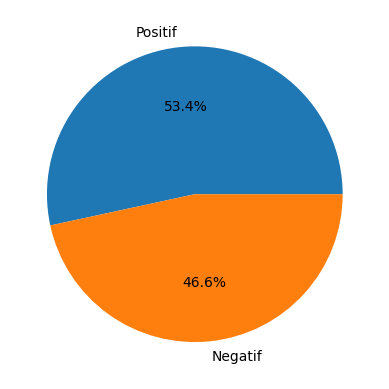

In [19]:
# create pie chart for sentiment distribution

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# change color text to white
df['predicted_label'].value_counts().plot(ax=ax, kind='pie', autopct='%1.1f%%')
ax.set_ylabel('')

plt.show()

In [20]:
# print sentiment group by topic
df.groupby(['topic', 'predicted_label']).size()

topic  predicted_label
0      Negatif             5
       Positif            12
1      Negatif            22
       Positif            17
2      Negatif            79
       Positif            63
3      Negatif            57
       Positif            72
4      Negatif            50
       Positif            80
dtype: int64

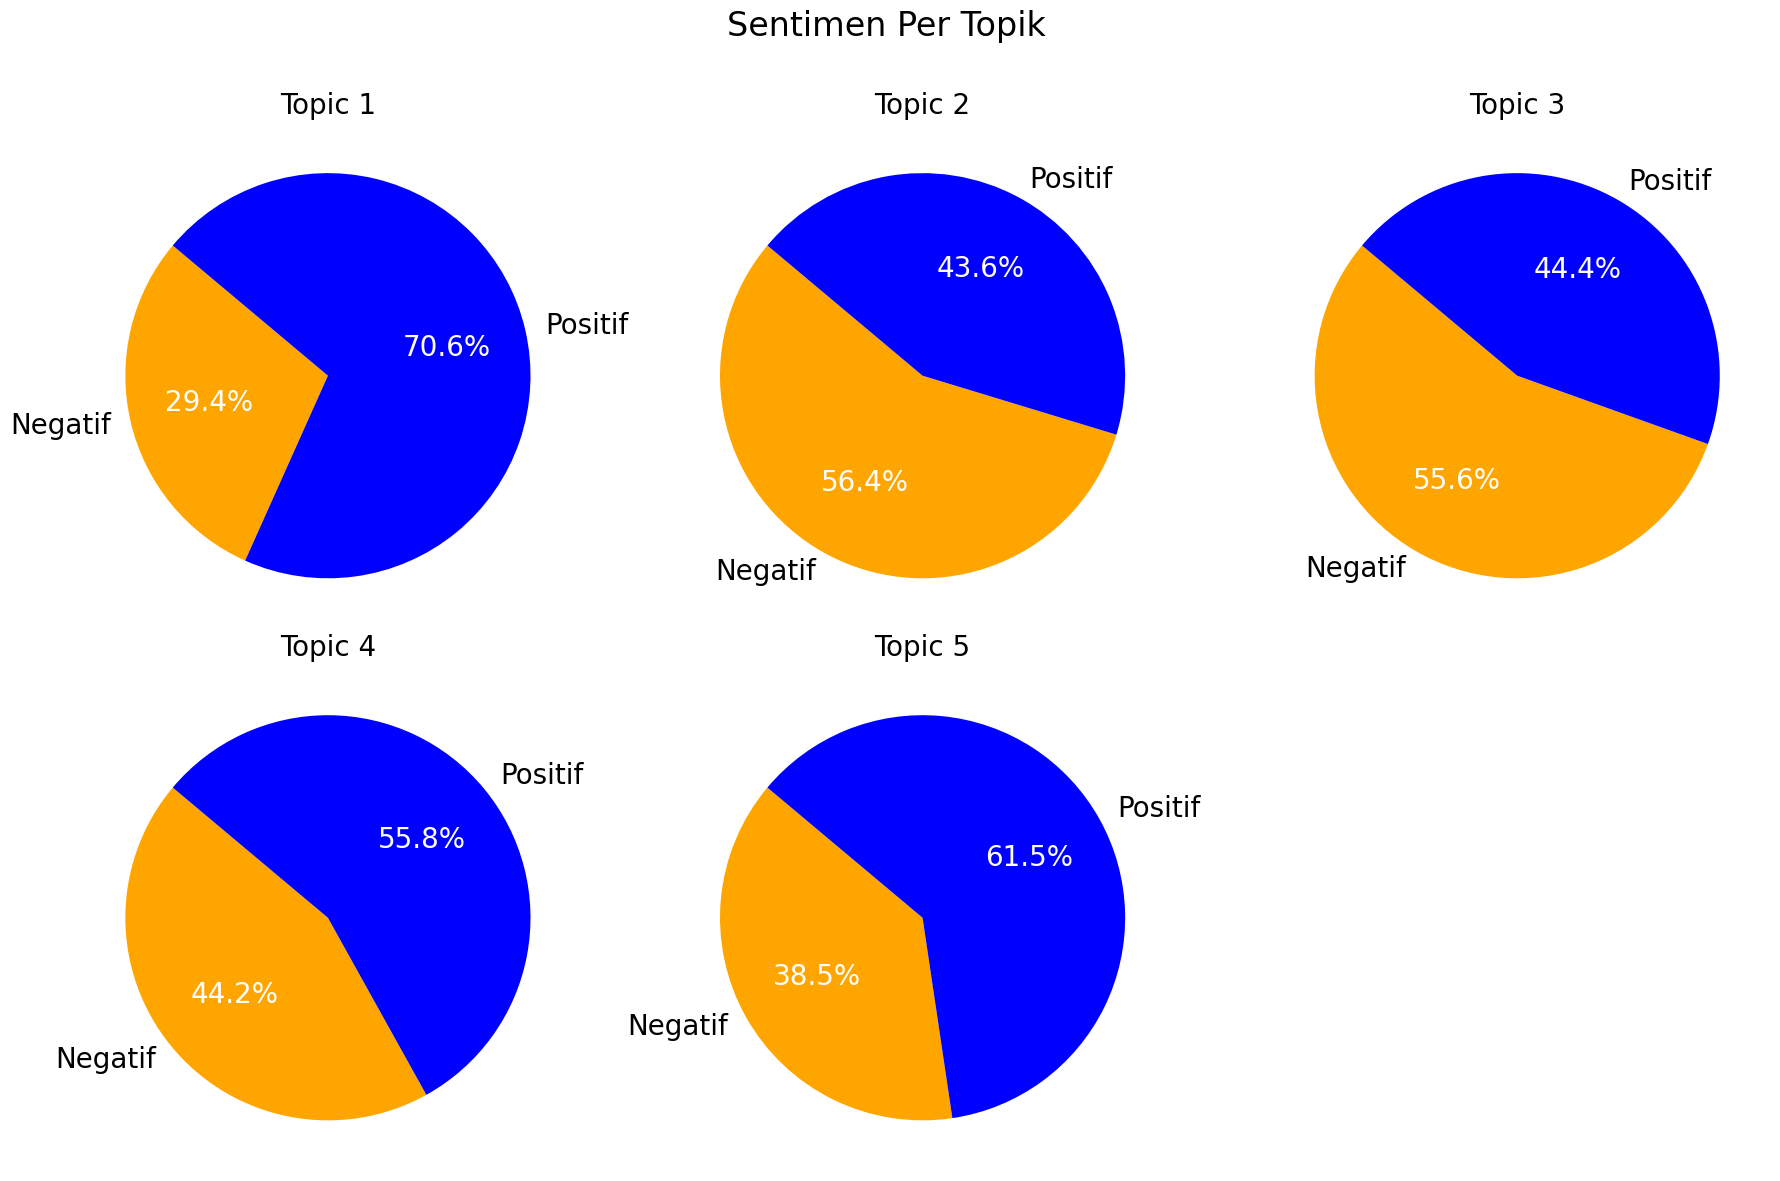

In [21]:
import matplotlib.pyplot as plt

# Misalkan 'df' adalah DataFrame yang digunakan
# Pertama, kita perlu mengelompokkan dan menghitung label yang diprediksi berdasarkan topik
grouped_df = df.groupby(['topic', 'predicted_label']).size().reset_index(name='counts')

# Buat sebuah figure dengan subplot untuk setiap topik
topics = grouped_df['topic'].unique()
num_topics = len(topics)

# Menentukan jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = (num_topics + 1) // num_rows  # Tambahkan 1 untuk memastikan genap jika num_topics ganjil

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), subplot_kw=dict(aspect="equal"))

# Tentukan warna untuk label yang diprediksi
label_colors = {'Positif': 'blue', 'Negatif': 'orange'}  # Sesuaikan dengan dataset Anda

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (ax, topic) in enumerate(zip(axes, topics), start=1):
    data = grouped_df[grouped_df['topic'] == topic]
    labels = data['predicted_label']
    sizes = data['counts']
    
    # Tentukan warna berdasarkan label
    colors = [label_colors[label] for label in labels]
    
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)
        autotext.set_color('white')  # Ubah warna teks persentase menjadi putih
    
    # bigger title
    ax.set_title(f'Topic {i}', fontsize=20)

# Remove any unused subplots
for j in range(i, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Sentimen Per Topik', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()




In [26]:
# df.to_csv('./hasil-klasifikasi/moist-cosrx-topic-sentimen-labelled.csv', index=False)
# df.to_csv('./hasil-klasifikasi/moist-cosrx-topic-sentimen-labelled-cnn-lstm.csv', index=False)

1. Moist Cosrx adalah salah satu produk perawatan kulit yang sedang populer di kalangan masyarakat. Banyak yang mengaku bahwa cream ini mampu membuat kulit terasa lebih lembap dan kenyal.
<br/>2. Namun, ada juga yang merasa bahwa Moist Cosrx tidak cocok dengan jenis kulit mereka. Beberapa orang mengalami iritasi dan jerawat setelah menggunakan produk ini.
<br/>3. Meskipun begitu, banyak juga yang tetap setia menggunakan Moist Cosrx karena hasilnya yang memuaskan. Mereka merasa bahwa cream ini mampu memberikan kelembapan yang tahan lama pada kulit.
<br/>4. Selain itu, beberapa pengguna juga mengatakan bahwa Moist Cosrx dapat membantu mengatasi masalah kulit seperti kusam dan kering.
<br/>5. Kesimpulannya, Moist Cosrx memang memiliki kelebihan dan kekurangan dalam perawatan kulit. Namun, sebelum mencobanya, sebaiknya lakukan tes pada kulit terlebih dahulu untuk menghindari efek samping yang tidak diinginkan.

In [35]:
pd.set_option('display.max_colwidth', None)

In [63]:
def predict_sentiment(model, tokenizer, text):
    # Tokenisasi teks
    sample_seq = tokenizer.texts_to_sequences([text])
    sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type, padding="post")
    
    # Prediksi sentimen menggunakan model
    prediction = model.predict(sample_padded)
    
    # Mendapatkan persentase sentimen
    probability = prediction[0][0]
    if probability >= 0.5:
        sentiment_label = "Positif"
        percentage = probability * 100
    else:
        sentiment_label = "Negatif"
        percentage = (1 - probability) * 100
    
    return sentiment_label, percentage

# Menggunakan fungsi untuk memprediksi sentimen dari contoh kalimat
sample_text = "@ohmybeautybank emang terlalu thick nder moist cosrx tapi soal ngelembabin sama bikin glowing dia mantep. coba pakai moist nya dabe beaute deh itu ringan banget gak bikin kusem tapi tetep ngelembabin di akuu"

predicted_label, sentiment_percentage = predict_sentiment(model, tokenizer, sample_text)
print(f"Label Sentimen: {predicted_label}")
print(f"Persentase Sentimen: {sentiment_percentage:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Label Sentimen: Positif
Persentase Sentimen: 80.08%
